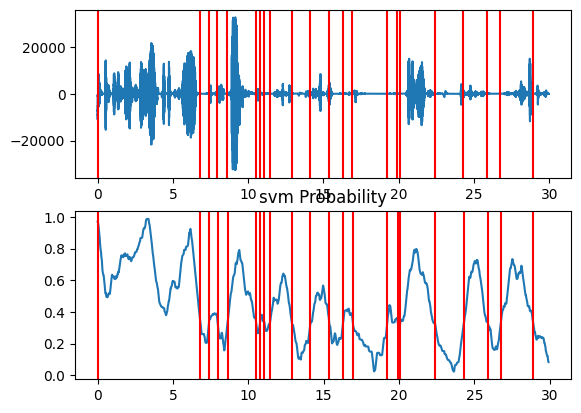

In [18]:
#import required libraries
import os
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
# path to audio file
# file ='../assets/202402181903_one_channel_120sec.wav'
# file ='../assets/noise_canceled.wav'
file = 'processed.wav'

assert os.path.isfile(file)

# below method returns the active / non silent segments of the audio file 
[Fs, x] = aIO.read_audio_file(file)
segments = aS.silence_removal(x, 
                             Fs, 
                             0.020, 
                             0.020, 
                             smooth_window=1.0, 
                             weight=0.3, 
                             plot=True)

## Remove too short windows

In [19]:
MIN_LENGTH, MIN_INTERVAL = 1, 3
START, END = 0, 1
modified_segments = [segment for segment in segments if segment[END] - segment[START] > MIN_LENGTH]
print(segments, len(segments))
print(modified_segments, len(modified_segments))

combined_segments = [modified_segments[0][:]]
index = 1
while index < len(modified_segments):
    if modified_segments[index][START]-combined_segments[-1][END] > MIN_INTERVAL:
        combined_segments.append(modified_segments[index])
    else:
        combined_segments[-1][END] = modified_segments[index][END]
    index += 1

print(combined_segments, len(combined_segments))

[[0.0, 6.82], [7.4, 7.96], [8.620000000000001, 10.5], [10.78, 11.06], [11.44, 12.88], [14.120000000000001, 15.36], [16.3, 16.92], [19.22, 19.900000000000002], [20.080000000000002, 22.38], [24.3, 25.88], [26.76, 28.900000000000002]] 11
[[0.0, 6.82], [8.620000000000001, 10.5], [11.44, 12.88], [14.120000000000001, 15.36], [20.080000000000002, 22.38], [24.3, 25.88], [26.76, 28.900000000000002]] 7
[[0.0, 15.36], [20.080000000000002, 28.900000000000002]] 2


## Slice silent windows

In [20]:
from pydub import AudioSegment
myaudio = AudioSegment.from_wav(file)

In [21]:
if combined_segments:
    for index, segment in enumerate(combined_segments):
        extract = myaudio[segment[START]*1000:segment[END]*1000]
        extract.export(f'active-{index}.wav', format="wav")

## Create audio metadata

In [22]:
metadata = [{ 'start_sec': segment[0], 'end_sec': segment[1] } for segment in combined_segments]
print(metadata)

[{'start_sec': 0.0, 'end_sec': 15.36}, {'start_sec': 20.080000000000002, 'end_sec': 28.900000000000002}]


In [23]:
import json
json_object = json.dumps(metadata, indent=4)
 
# Writing to sample.json
with open("audio_metadata.json", "w") as outfile:
    outfile.write(json_object)